<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230703_%EB%B6%84%EB%A5%98%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블

여러 모델을 조합하여 더 정확한 예측

> voting, bagging, boosting

* voting
hard: 각 weaker learner들의 예측 결과값을 바탕으로 다수결 투표하는 방식
soft: 에측 확률값의 평균 또는 가중치 합 사용

> Tree기준이므로 파라미터 조절시 판단 참고

* bagging(동시에 진행)
boostrap을 사용 중복 추출을 하여 여러 데이터 셋을 만든다
각 데이터를 이용하여 같은 종휴의 분류기로 다양한 선택지를 만든다

>
* Boosting
약한 분류기를 이용하여 에러를 보완하는 방식으로 다음 데이터셋의 가중치를 변환한다(차례대로 진행)

* Light GBM
순차적으로 tree생성하고 결합하는 방식

* XGBoost

* Categorical Boosting
범주형 변수가 많은 데이터셋에서 높은 성능이 보인다

# random forest

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [82]:
wine = pd.read_csv('winequalityN.csv')

!wget은 리눅스에서 web데이터 가져오기
!gdown은 window에서

In [83]:
df = wine.copy()
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [85]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [86]:
df.shape

(6497, 13)

In [87]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [88]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [89]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [90]:
df['quality'].value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [91]:
df = df.dropna()

In [92]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [93]:
# 값을 0~6사이로 만들어 준다
df['quality'] = df['quality'] - 3

<ipython-input-93-6fca60f3dce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = df['quality'] - 3


In [94]:
y = df['quality']
X = df.iloc[:,1:12]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=0)
X_train.shape

(5170, 11)

In [96]:
from imblearn.over_sampling import RandomOverSampler

In [97]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [98]:
y_train.value_counts().reset_index()

,index,quality
0,2,2256
1,5,2256
2,4,2256
3,3,2256
4,1,2256
5,0,2256
6,6,2256


In [99]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_s, y_train)
y_pred = rfc.predict(X_test_s)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_score(y_test, y_pred)

0.7045630317092034

In [101]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [50,100,150,200]

}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=params, n_jobs=1)
grid.fit(X_train_s, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [50, 100, 150, 200]})

In [102]:
grid.best_params_

{'max_depth': 100}

In [103]:
grid.best_score_

0.9257234424358483

In [104]:
grid.best_estimator_.score(X_test_s, y_test)

0.6983758700696056

In [105]:
#knn
#svc
#dt

In [106]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_s, y_train)
y_pred = knn.predict(X_test_s)
accuracy_score(y_test, y_pred)

0.5359628770301624

In [107]:
#svc
from sklearn import svm
from sklearn.svm import SVC
svc = svm.SVC()
svc.fit(X_train_s, y_train)
y_pred = svc.predict(X_test_s)
accuracy_score(y_test, y_pred)

0.45243619489559167

In [108]:
#dt
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_s, y_train)
y_pred = dt.predict(X_test_s)
accuracy_score(y_test, y_pred)

0.6063418406805878

# Classification

In [269]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [142]:
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [143]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [145]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [148]:
len(train.columns)

563

In [270]:
y = train['Activity']
X = train.iloc[:,:562]

In [271]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# 레이블 인코딩 수행
y = encoder.fit_transform(y)
y

array([2, 2, 2, ..., 5, 5, 5])

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_p = pca.fit_transform(X_train_s)
X_test_p = pca.transform(X_test_s)

In [273]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Random Forest 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 특성의 중요도 추출
importance = model.feature_importances_

# 중요도 시각화
importance.mean()

0.0017793594306049821

In [274]:
a = importance > importance.mean()
k = np.where(importance > importance.mean())
k = k[0].tolist()
len(k)

122

In [277]:
#위에있는 인덱스값을 이용하여 원하는 컬럼만 불러올 수 있을까?
X.iloc[:,k]

,tBodyAcc-std()-X,tBodyAcc-mad()-X,tBodyAcc-max()-X,tBodyAcc-energy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,...,fBodyAccMag-std(),fBodyAccMag-mad(),fBodyAccMag-max(),fBodyAccMag-sma(),fBodyAccMag-energy(),fBodyAccMag-entropy(),fBodyBodyAccJerkMag-energy(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.995279,-0.995112,-0.934724,-0.999945,0.376314,0.660790,0.963396,-0.140840,0.115375,-0.985250,...,-0.956134,-0.948870,-0.974321,-0.952155,-0.998285,-0.646376,-0.999918,-0.841247,0.179941,-0.058627
1,-0.998245,-0.998807,-0.943068,-0.999991,-0.013429,0.579382,0.966561,-0.141551,0.109379,-0.997411,...,-0.975866,-0.975777,-0.978226,-0.980857,-0.999472,-0.816674,-0.999867,-0.844788,0.180289,-0.054317
2,-0.995380,-0.996520,-0.938692,-0.999969,-0.124698,0.608900,0.966878,-0.142010,0.101884,-0.999574,...,-0.989015,-0.985594,-0.993062,-0.987795,-0.999807,-0.907014,-0.999845,-0.848933,0.180637,-0.049118
3,-0.996091,-0.997099,-0.938692,-0.999976,-0.305693,0.507459,0.967615,-0.143976,0.099850,-0.996646,...,-0.986742,-0.983524,-0.990230,-0.987519,-0.999770,-0.907014,-0.999895,-0.848649,0.181935,-0.047663
4,-0.998139,-0.998321,-0.942469,-0.999991,-0.155804,0.599213,0.968224,-0.148750,0.094486,-0.998429,...,-0.990063,-0.992324,-0.990506,-0.993591,-0.999873,-0.907014,-0.999941,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.195387,-0.282301,0.210795,-0.674986,-0.211822,-0.283335,0.923148,-0.222004,-0.039492,-0.944438,...,-0.232600,-0.007392,-0.401674,-0.097106,-0.584282,0.492474,-0.732995,-0.791883,0.238604,0.049819
7348,-0.235309,-0.322552,0.117440,-0.706359,-0.198555,-0.274504,0.918343,-0.242054,-0.039863,-0.953598,...,-0.275373,-0.172448,-0.410577,-0.158161,-0.632536,0.427792,-0.775857,-0.771840,0.252676,0.050053
7349,-0.218218,-0.304515,0.043999,-0.693162,-0.226826,-0.198452,0.919810,-0.236950,-0.026805,-0.978445,...,-0.220288,-0.216074,-0.362904,-0.298654,-0.641170,0.466101,-0.801702,-0.779133,0.249145,0.040811
7350,-0.219139,-0.310487,0.101702,-0.693855,-0.257775,-0.189915,0.922323,-0.233230,-0.004984,-0.974112,...,-0.234539,-0.220443,-0.397687,-0.346795,-0.663579,0.390648,-0.826289,-0.785181,0.246432,0.025339


In [189]:
#svm parameter tuning
param_dist = {
    'C' : [0.01, 0.1, 1, 10],
    'gamma' : [0.01, 0.1, 1, 10]
}

gs = GridSearchCV(SVC(), param_dist, cv=5,scoring='f1_macro')
gs.fit(X_train,y_train)

print('test f1 : ', gs.score(X_test, y_test))
print('최적의 parameters : ', gs.best_params_)

test f1 :  0.9930598564722652
최적의 parameters :  {'C': 10, 'gamma': 0.01}


In [190]:
m=SVC(kernel='rbf',C=10, gamma=0.01)
m.fit(X_train,y_train)

pred_train = m.predict(X_train)
pred_test = m.predict(X_test)

print(accuracy_score(y_test, pred_test))

0.9925220938137321


In [192]:
test.iloc[:,:562]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24


In [199]:
test['Activity'] = encoder.fit_transform(test['Activity'])

In [200]:
predt = m.predict(test.iloc[:,:562])

In [201]:
accuracy_score(test['Activity'], predt)

0.9273837801153716

# 차원축소

주성분 분석(PCA)

> 분산이 최대로 되는 축을 선택, 데이터의 분산을 가장 잘 유지하는 축들을 주성분이라고 한다(주성분을 투영-projection)

> 단점: 선형성이 없다면 적용할 수 없다.

In [202]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [206]:
from sklearn import datasets
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [207]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [208]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [213]:
X = wine.data
y = wine.target

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [223]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_s, y_train)

RandomForestClassifier(random_state=0)

In [225]:
y_pred = rfc.predict(X_test_s)
accuracy_score(y_test, y_pred)
rfc.score(X_test_s, y_test)

1.0

In [235]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_p = pca.fit_transform(X_train_s)
X_test_p = pca.transform(X_test_s)

In [237]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_p, y_train)
rfc.score(X_test_p, y_test)

1.0

<Axes: >

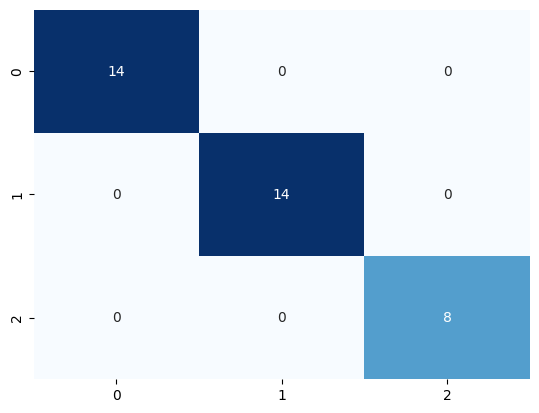

In [238]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)

# 비지도 학습

In [281]:
iris = pd.read_csv('iris.csv')
df = iris.copy()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [282]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [283]:
X = df.drop('Species', axis=1)
y = df['Species']

In [284]:
ss = StandardScaler()
X_s = ss.fit_transform(X)

In [285]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_p = pca.fit_transform(X_s)

In [286]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# 레이블 인코딩 수행
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [292]:
df['PC_1'] = X_p[:,0]
df['PC_2'] = X_p[:,1]

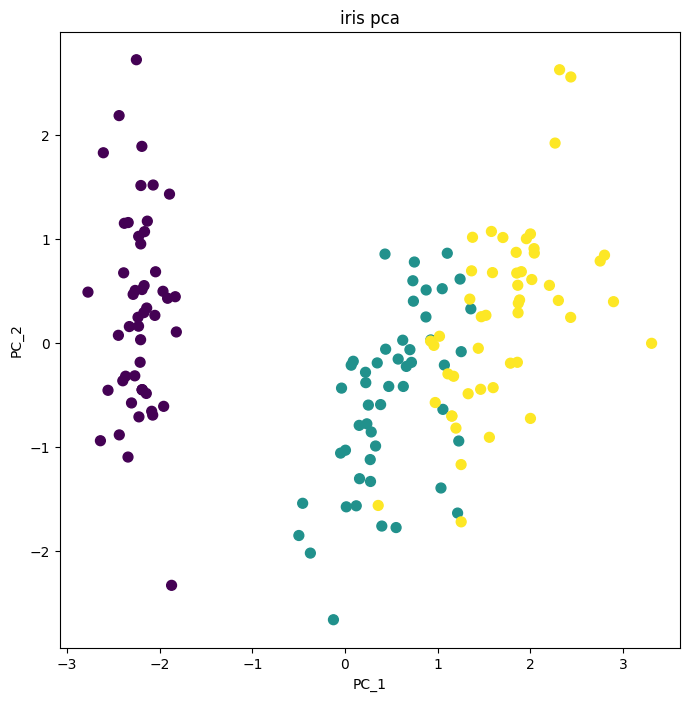

In [293]:
plt.figure(figsize=(8,8))
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('iris pca')

color = ['r', 'g', 'b']
plt.scatter(df['PC_1'], df['PC_2'], c=y, s=50)
plt.show()

In [297]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(X_p)
pred  = kmeans.predict(X_p)
accuracy_score(y, pred)

0.82

# k값 설정

In [300]:
inertia = []
for k in range(3,10):
  kmeans = KMeans(n_clusters = k, random_state=0, n_init="auto")
  kmeans.fit(X_p)
  inertia.append(kmeans.inertia_)

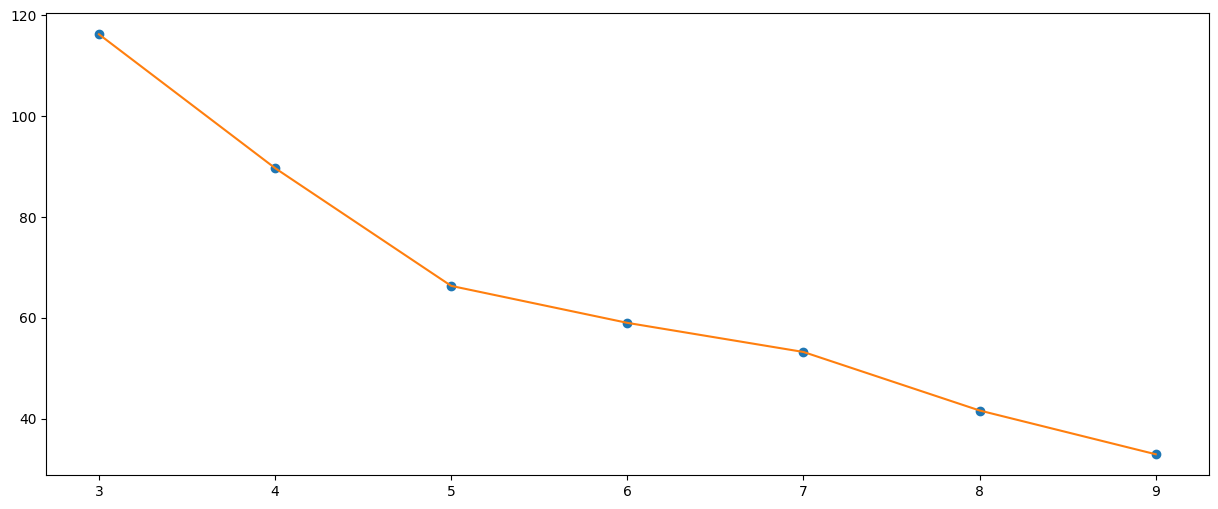

In [304]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(3,10),inertia, 'o')
plt.plot(np.arange(3,10),inertia, '-')
plt.show()

In [305]:
!pip install yellowbrick

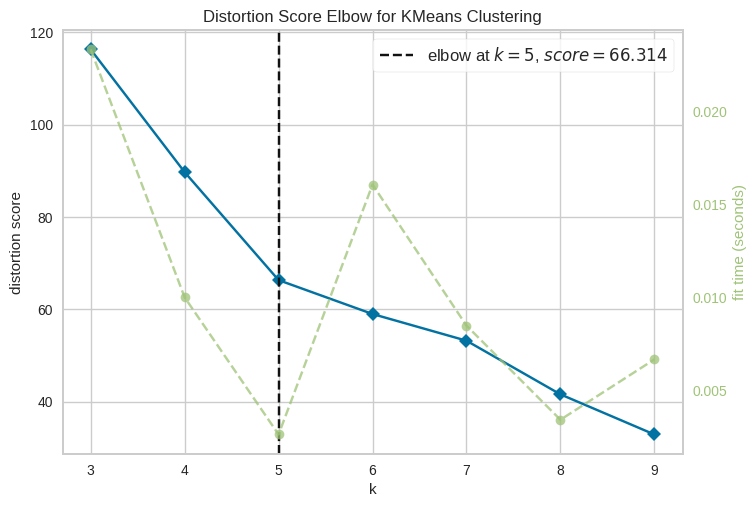

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [308]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=0, n_init="auto")
visualizer = KElbowVisualizer(model, k=(3,10))
visualizer.fit(X_p)
visualizer.show()